In [459]:
"""The data given in the url  is related with direct marketing campaigns of a banking institution. The marketing 
campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to 
access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. Build a model to predict 
whether client will subscribe to term deposit
"""
import pandas as pd
import numpy as np

In [460]:
data = pd.read_csv('bank.csv',delimiter = ';')
data.drop(['job','marital','education','default','housing','loan','month','poutcome','contact'],axis=1,inplace=True)
data.head()

,age,balance,day,duration,campaign,pdays,previous,y
0,30,1787,19,79,1,-1,0,no
1,33,4789,11,220,1,339,4,no
2,35,1350,16,185,1,330,1,no
3,30,1476,3,199,4,-1,0,no
4,59,0,5,226,1,-1,0,no


In [461]:
data=pd.get_dummies(data=data,drop_first=True)
data['age'] = (data['age'] - data['age'].mean())/(data['age'].std())
data['balance'] = (data['balance'] - data['balance'].mean())/(data['balance'].std())
data['day'] = (data['day'] - data['day'].mean())/(data['day'].std())
data['duration'] = (data['duration'] - data['duration'].mean())/(data['duration'].std())
data['campaign'] = (data['campaign'] - data['campaign'].mean())/(data['campaign'].std())
data['pdays'] = (data['pdays'] - data['pdays'].mean())/(data['pdays'].std())
data['previous'] = (data['previous'] - data['previous'].mean())/(data['previous'].std())

In [462]:
Training_data = int(0.70*len(data))
Train_data = data.iloc[0:Training_data,:]
Test_data = data.iloc[Training_data:,:]


x_train,y_train,x_test,y_test = np.array(Train_data.iloc[:,0:38]),np.array(Train_data.iloc[:,-1:]),np.array(Test_data.iloc[:,0:38]),np.array(Test_data.iloc[:,-1:])

In [463]:
x_train.shape,y_train.shape

((3164, 8), (3164, 1))

In [464]:
def shape(x,y):
    transform_x = x.shape[0]
    transform_w = x.shape[1]
    return transform_x, transform_w

In [465]:
def initialize(x, y, transform_x, transform_w):
    x = np.reshape(x,(transform_w,transform_x))
    y = np.reshape(y,(1,transform_x))
    
    np.random.seed(0)
    W = np.random.randn(1,transform_w) *0.01
    b = np.zeros((1,1))
    
    parameters = {'W':W, 'b':b}
    return x, y, parameters

In [466]:
def forward_propagation(x, y, parameters):
    W = parameters['W']
    b = parameters['b']
    
    Z = np.dot(W,x) + b

    return Z

In [467]:
def sigmoid(Z):
    sigmoid = 1 / (1 + np.exp(-Z))
    return sigmoid

In [468]:
def backward_propagation(A, x, y):
    dz = A - y
    m = x.shape[1]
    
    dw = (np.dot(x,dz.T))/m
    
    db = (np.sum(dz))/m
    db = np.reshape(db,(1,1))
    
    grads = {'dw':dw, 'db':db}
    return grads

In [469]:
def update(grads,parameters):
    learning_rate = 0.01
    W = parameters['W']
    b = parameters['b']
    
    dw = grads['dw']
    db = grads['db']
    
    W = W - (learning_rate * dw.T)
    b = b - (learning_rate * db)
    
    parameters = {'W':W, 'b':b}
    return parameters

In [470]:
def compute_cost(A, x, y):
    m = x.shape[1]
    L = (y * np.log(A)) +((1-y) * np.log(1-A))
    cost = - ( np.sum(L) / m)
    return cost

In [471]:
def nn_model(x1, y1):
    epoch = 2500
    cost_list = [ ]
    transform_x, transform_w = shape(x1, y1)
    x, y, parameters = initialize(x1, y1, transform_x, transform_w)
    for i in range(epoch):
        Z = forward_propagation(x, y, parameters)
        A = sigmoid(Z)
        cost = compute_cost(A, x, y)
        cost_list.append(cost)
        grads = backward_propagation(A, x, y)
        parameters = update(grads, parameters)
    return parameters, cost_list

In [472]:
new_parameters, cost_list = nn_model(x_train, y_train)

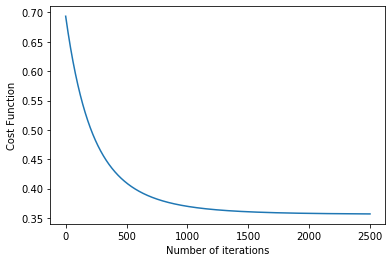

In [473]:
import matplotlib.pyplot as plt
plt.plot(cost_list)
plt.xlabel('Number of iterations')
plt.ylabel('Cost Function')
plt.show()

In [474]:
def check_prediction(x1, y1, new_parameters):
    transform_x, transform_w = shape(x1, y1)
    x, y, para = initialize(x1, y1, transform_x, transform_w)
    Z1 = forward_propagation(x, y, new_parameters)
    A1 = sigmoid(Z1)
    return A1, y


In [475]:
A1, y = check_prediction(x_test, y_test, new_parameters)
a = np.round(A1)
y = y

In [476]:
def check_accuracy(a, y):
    accuracy = 0
    n = a.shape[1]
    for i in range(len(a[0])):
        if (a[0][i] == y[0][i]):
            accuracy += 1
    acc = (accuracy / n) * 100
    return acc

In [477]:
accuracy = check_accuracy(a,y)
print(accuracy)

88.57774502579218


In [478]:
a.shape,y.shape

((1, 1357), (1, 1357))

In [479]:
len(a[0])

1357